<a href="https://colab.research.google.com/github/EritonPalma/Challenge-Alura-Store---Desafio-1-/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()
loja.tail()
loja.shape
loja.columns
loja3.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análise do faturamento



In [2]:
# Calcular o faturamento total das lojas 1, 2, 3 e 4
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Calcular o Faturamento Total Geral
faturamento_total_geral = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4

# Calcular a porcentagem de participação de cada loja
part_loja1 = (faturamento_loja1 / faturamento_total_geral) * 100
part_loja2 = (faturamento_loja2 / faturamento_total_geral) * 100
part_loja3 = (faturamento_loja3 / faturamento_total_geral) * 100
part_loja4 = (faturamento_loja4 / faturamento_total_geral) * 100

print(f"## Faturamento e Participação por Loja")
print(f"---")
print(f"O Faturamento Total da Loja 1: R$ {faturamento_loja1:,.2f} ({part_loja1:.1f}%)")
print(f"O Faturamento Total da Loja 2: R$ {faturamento_loja2:,.2f} ({part_loja2:.1f}%)")
print(f"O Faturamento Total da Loja 3: R$ {faturamento_loja3:,.2f} ({part_loja3:.1f}%)")
print(f"O Faturamento Total da Loja 4: R$ {faturamento_loja4:,.2f} ({part_loja4:.1f}%)")
print(f"---")
print(f"O **Faturamento Total Geral**: R$ {faturamento_total_geral:,.2f}")



## Faturamento e Participação por Loja
---
O Faturamento Total da Loja 1: R$ 1,534,509.12 (26.1%)
O Faturamento Total da Loja 2: R$ 1,488,459.06 (25.4%)
O Faturamento Total da Loja 3: R$ 1,464,025.03 (24.9%)
O Faturamento Total da Loja 4: R$ 1,384,497.58 (23.6%)
---
O **Faturamento Total Geral**: R$ 5,871,490.79


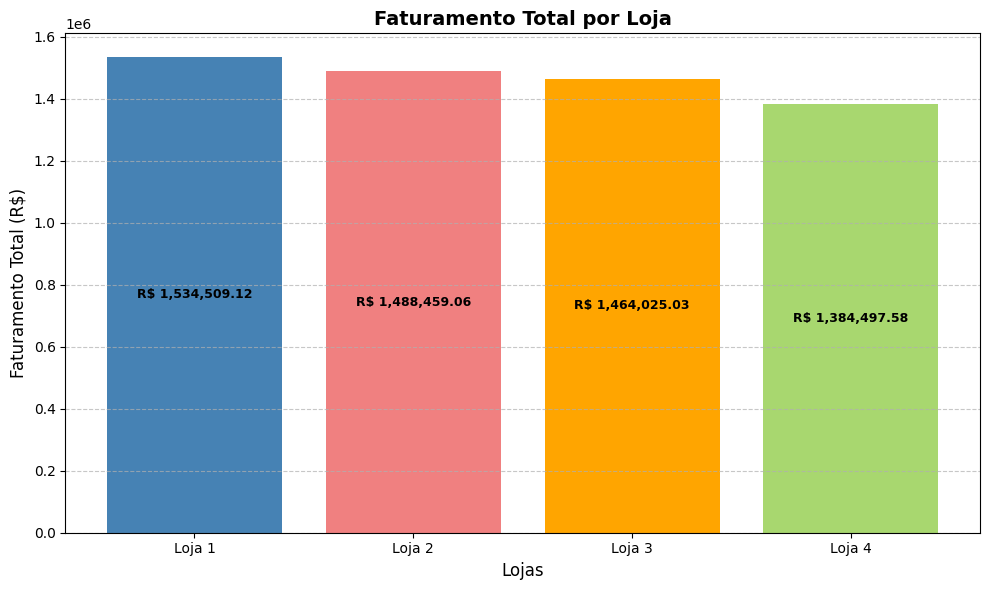


** A loja com o menor faturamento é a Loja 4 com R$ 1,384,497.58 **.


In [3]:
import matplotlib.pyplot as plt

# Preparar listas para geração do gráfico de colunas do faturamento
# total de cada loja
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Definir as cores das colunas do gráfico
cores_finais = ['#4682B4', '#F08080', '#FFA500', '#A8D76F']

#  Identificar a loja com menor faturamento
loja_menor_fat = nomes_lojas[faturamentos.index(min(faturamentos))]

# Criar gráfico de coluna
plt.figure(figsize=(10, 6))
barras = plt.bar(nomes_lojas, faturamentos, color=cores_finais)

# Adicionando o valor do faturamento dentro de cada coluna
for barra in barras:
    yval = barra.get_height()
    # Posição Y: Colocamos o texto a aproximadamente 50% da altura da barra
    # Cor do Texto: Usamos a cor preta para garantir contraste com a cor da barra
    cor_texto = 'black' # Alterado para preto para melhor legibilidade

    plt.text(barra.get_x() + barra.get_width()/2, yval * 0.50, # 50% da altura da barra
             f'R$ {yval:,.2f}',
             ha='center', # Centralizado horizontalmente
             va='center', # Centralizado verticalmente
             fontsize=9,
             color=cor_texto,
             fontweight='bold')

# Configurar gráfico de colunas
plt.title('Faturamento Total por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir gráfico de colunas
plt.show()

# Conclusão
faturamento_minimo = min(faturamentos)
print(f"\n** A loja com o menor faturamento é a {loja_menor_fat} com R$ {faturamento_minimo:,.2f} **.")

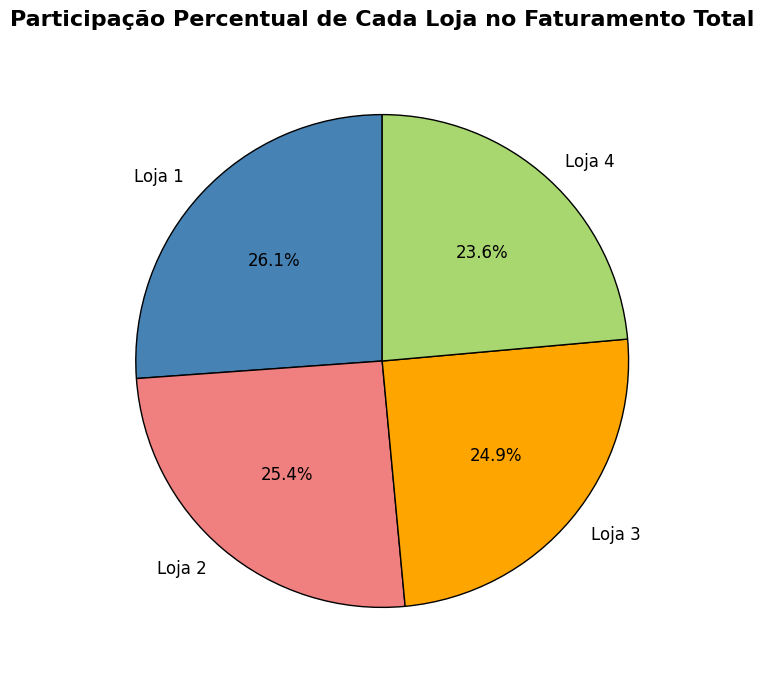


** A loja com o menor participação no faturamento é a Loja 4 com participação de  23.6 **.


In [4]:
# Configurar e Gerar o Gráfico de Pizza
plt.figure(figsize=(10, 8)) # Define o tamanho da figura

# Usa o método plt.pie() diretamente com a lista 'faturamentos'
plt.pie(
    faturamentos,
    labels=nomes_lojas,
    colors=cores_finais,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12}
)

# Adiciona título
plt.title('Participação Percentual de Cada Loja no Faturamento Total', fontsize=16, pad=20, fontweight='bold')

# Mostra o gráfico
plt.show()

# Conclusão
faturamento_total_geral = sum(faturamentos)
# Define loja_menor_fat_index antes de usá-lo
loja_menor_fat_index = faturamentos.index(min(faturamentos))
loja_menor_fat = nomes_lojas[loja_menor_fat_index]
participacao_menor_fat = (min(faturamentos) / faturamento_total_geral) * 100

print(f"\n** A loja com o menor participação no faturamento é a {loja_menor_fat} com participação de  {participacao_menor_fat:,.1f} **.")

## Resumo dos Indicadores por Loja ##
|  Loja  | Faturamento Total |   Nº de Vendas     |  Ticket Médio    |
| Loja 1 |   R$ 1,534,509.12 |      2359          |    R$ 650.49     |
| Loja 2 |   R$ 1,488,459.06 |      2359          |    R$ 630.97     |
| Loja 3 |   R$ 1,464,025.03 |      2359          |    R$ 620.61     |
| Loja 4 |   R$ 1,384,497.58 |      2358          |    R$ 587.15     |


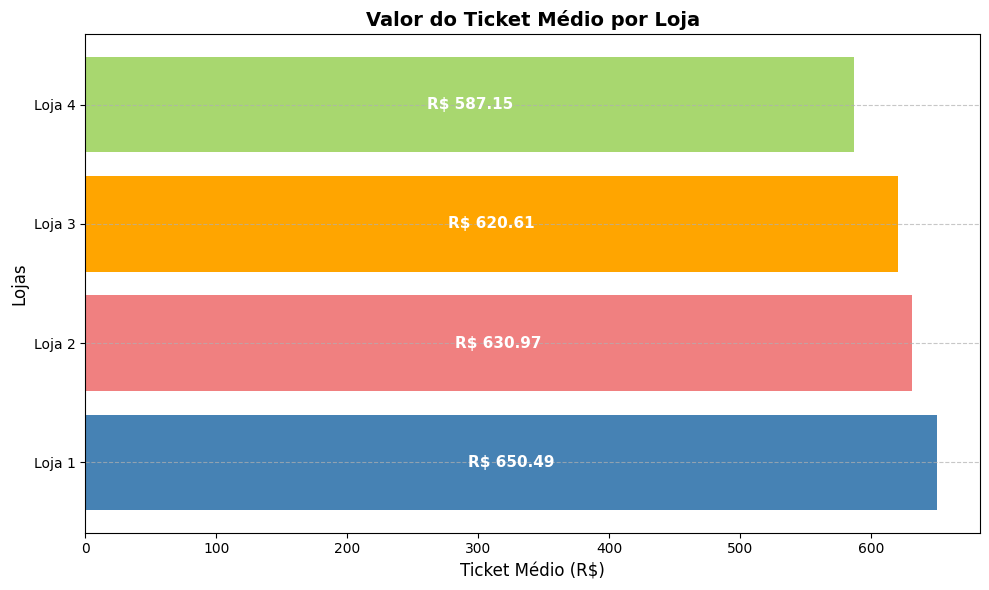


** A loja com o menor ticket médio é a Loja 4 com R$ 587.15 **.


In [5]:
# 2. Cálculo do Número de Vendas
vendas_loja1 = loja.shape[0]
vendas_loja2 = loja2.shape[0]
vendas_loja3 = loja3.shape[0]
vendas_loja4 = loja4.shape[0]

# 3. Cálculo do Ticket Médio (Faturamento / Vendas)
ticket_loja1 = faturamento_loja1 / vendas_loja1
ticket_loja2 = faturamento_loja2 / vendas_loja2
ticket_loja3 = faturamento_loja3 / vendas_loja3
ticket_loja4 = faturamento_loja4 / vendas_loja4

# Impressão dos Resultados
print(f"## Resumo dos Indicadores por Loja ##")
print(f"|  Loja  | Faturamento Total |   Nº de Vendas     |  Ticket Médio    |")
print(f"| Loja 1 |   R$ {faturamento_loja1:,.2f} |      {vendas_loja1}          |    R$ {ticket_loja1:,.2f}     |")
print(f"| Loja 2 |   R$ {faturamento_loja2:,.2f} |      {vendas_loja2}          |    R$ {ticket_loja2:,.2f}     |")
print(f"| Loja 3 |   R$ {faturamento_loja3:,.2f} |      {vendas_loja3}          |    R$ {ticket_loja3:,.2f}     |")
print(f"| Loja 4 |   R$ {faturamento_loja4:,.2f} |      {vendas_loja4}          |    R$ {ticket_loja4:,.2f}     |")

# Preparação dos dados para o gráfico de barras
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
tickets_medios = [ticket_loja1, ticket_loja2, ticket_loja3, ticket_loja4]

# Encontrando a loja com menor Ticket Médio
loja_menor_ticket_index = tickets_medios.index(min(tickets_medios))
loja_menor_ticket = nomes_lojas[loja_menor_ticket_index]

# Criação do gráfico de barras para Ticket Médio
plt.figure(figsize=(10, 6))
barras = plt.barh(nomes_lojas, tickets_medios, color=cores_finais)

# Adicionando o valor do Ticket Médio DENTRO de cada barra
for barra in barras:
    width = barra.get_width() # O valor do Ticket Médio
    # Posição X: Aproximadamente 50% da largura da barra
    x_pos = width * 0.50
    # Posição Y: Centro vertical da barra
    y_pos = barra.get_y() + barra.get_height() / 2

    # Adiciona o texto, garantindo cor branca para contraste na maioria das barras
    plt.text(x_pos, y_pos,
             f'R$ {width:,.2f}',
             ha='center', va='center', fontsize=11,
             color='white', fontweight='bold')

# Configurações do gráfico de barras
plt.title('Valor do Ticket Médio por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Ticket Médio (R$)', fontsize=12)
plt.ylabel('Lojas', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibindo o gráfico de barras
plt.show()

print(f"\n** A loja com o menor ticket médio é a {loja_menor_ticket} com R$ {tickets_medios[loja_menor_ticket_index]:,.2f} **.")

# 2. Vendas por Categoria

In [6]:
# Calcular a qtde de produtos vendidos por categoria do produto
# e contar o número de vendas em cada categoria por loja

vendas_por_categoria1 = loja.groupby('Categoria do Produto').size()
vendas_por_categoria2 = loja2.groupby('Categoria do Produto').size()
vendas_por_categoria3 = loja3.groupby('Categoria do Produto').size()
vendas_por_categoria4 = loja4.groupby('Categoria do Produto').size()


# Converter a Series resultante para um DataFrame e dar um nome à coluna de contagem
vendas_por_categoria1 = vendas_por_categoria1.reset_index(name='Total de Vendas por Categoria - Loja 1')
vendas_por_categoria2 = vendas_por_categoria2.reset_index(name='Total de Vendas por Categoria - Loja 2')
vendas_por_categoria3 = vendas_por_categoria3.reset_index(name='Total de Vendas por Categoria - Loja 3')
vendas_por_categoria4 = vendas_por_categoria4.reset_index(name='Total de Vendas por Categoria - Loja 4')

# Ordenar o resultado para visualizar as categorias mais vendidas primeiro
categorias_populares1 = vendas_por_categoria1.sort_values(
    by='Total de Vendas por Categoria - Loja 1',
    ascending=False
)

categorias_populares2 = vendas_por_categoria2.sort_values(
    by='Total de Vendas por Categoria - Loja 2',
    ascending=False
)

categorias_populares3 = vendas_por_categoria3.sort_values(
    by='Total de Vendas por Categoria - Loja 3',
    ascending=False
)

categorias_populares4 = vendas_por_categoria4.sort_values(
    by='Total de Vendas por Categoria - Loja 4',
    ascending=False
)

# Exibir o resultado
print("--- Quantidade de Produtos Vendidos por Categoria na Loja 1 ---")
print(categorias_populares1)

print("--- Quantidade de Produtos Vendidos por Categoria na Loja 2 ---")
print(categorias_populares2)

print("--- Quantidade de Produtos Vendidos por Categoria na Loja 3 ---")
print(categorias_populares3)

print("--- Quantidade de Produtos Vendidos por Categoria na Loja 4 ---")
print(categorias_populares4)




--- Quantidade de Produtos Vendidos por Categoria na Loja 1 ---
    Categoria do Produto  Total de Vendas por Categoria - Loja 1
6                 moveis                                     465
2            eletronicos                                     448
0             brinquedos                                     324
1       eletrodomesticos                                     312
3        esporte e lazer                                     284
4  instrumentos musicais                                     182
5                 livros                                     173
7  utilidades domesticas                                     171
--- Quantidade de Produtos Vendidos por Categoria na Loja 2 ---
    Categoria do Produto  Total de Vendas por Categoria - Loja 2
6                 moveis                                     442
2            eletronicos                                     422
0             brinquedos                                     313
1       eletrodomesticos   

In [7]:
# Consolidar os DataFrames de cada loja em um único DataFrame
todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calcular a qtde de produtos vendidos por categoria do produto
# e contar o número de vendas em cada categoria
vendas_por_categoria = todas_lojas.groupby('Categoria do Produto').size()

# Converter a Series resultante para um DataFrame e dar um nome
# à coluna de contagem
vendas_por_categoria = vendas_por_categoria.reset_index(name='Total de Vendas por Categoria - Todas Lojas')

# Ordenar o resultado para visualizar as categorias mais vendidas primeiro
categorias_mais_vendidas = vendas_por_categoria.sort_values(
    by='Total de Vendas por Categoria - Todas Lojas',
    ascending=False
)

# Exibir o resultado
print("--- Ranking das Categorias Mais Vendidas Considerando as 4 Lojas ---")
print(categorias_mais_vendidas)

--- Ranking das Categorias Mais Vendidas Considerando as 4 Lojas ---
    Categoria do Produto  Total de Vendas por Categoria - Todas Lojas
6                 moveis                                         1886
2            eletronicos                                         1772
0             brinquedos                                         1290
1       eletrodomesticos                                         1149
3        esporte e lazer                                         1113
4  instrumentos musicais                                          753
5                 livros                                          742
7  utilidades domesticas                                          730


/tmp/ipython-input-1118829363.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Pastel1')


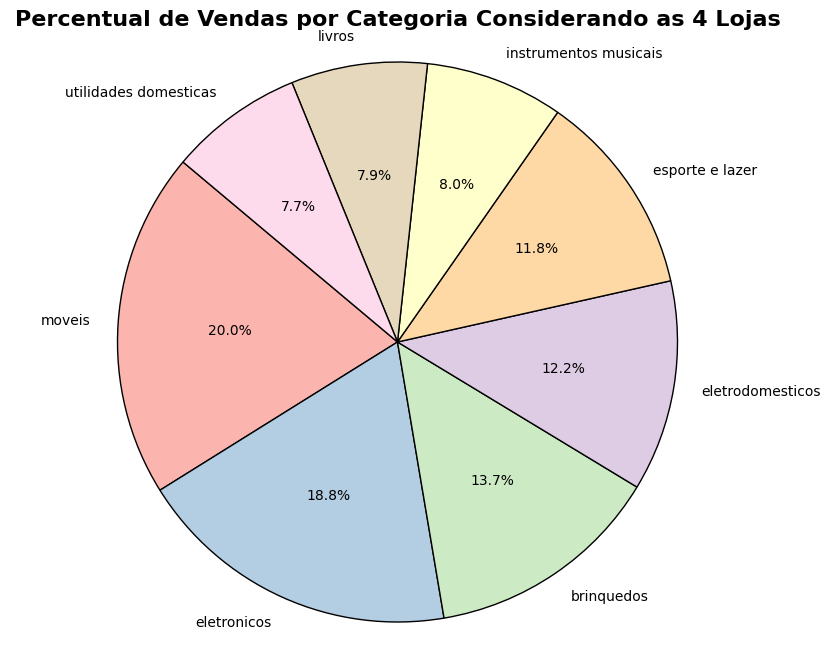

In [8]:
import matplotlib.cm as cm

# --- Geração do Gráfico de Pizza ---

# Definir os dados para o gráfico
vendas = categorias_mais_vendidas['Total de Vendas por Categoria - Todas Lojas']
categorias = categorias_mais_vendidas['Categoria do Produto']

# Escolhe uma paleta de cores pastéis do Matplotlib (Pastel1)
cmap = cm.get_cmap('Pastel1')
cores_suaves = cmap(range(len(categorias)))

# Configurar o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(
    vendas,
    labels=categorias,
    colors=cores_suaves,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

# Adicionar título
plt.title('Percentual de Vendas por Categoria Considerando as 4 Lojas', fontsize=16, fontweight='bold')

# Garantir que o gráfico seja um círculo
plt.axis('equal')

# Exibir o gráfico
plt.show()

# 3. Média de Avaliação das Lojas


In [9]:
# Calcular a média da Avaliação da compra para cada loja
media_loja1 = loja['Avaliação da compra'].mean()
media_loja2 = loja2['Avaliação da compra'].mean()
media_loja3 = loja3['Avaliação da compra'].mean()
media_loja4 = loja4['Avaliação da compra'].mean()

# 3. Organizar os resultados em um DataFrame para facilitar a comparação
dados_medias = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média da Avaliação': [media_loja1, media_loja2, media_loja3, media_loja4]
}

df_medias = pd.DataFrame(dados_medias)

# Ordenar por avaliação para ver qual loja teve a melhor média
df_medias_ordenado = df_medias.sort_values(
    by='Média da Avaliação',
    ascending=False
).reset_index(drop=True)

# Exibir os resultados
print("--- Média da Avaliação de Compra por Loja ---")
print(df_medias_ordenado.to_markdown(index=False, floatfmt=".2f"))


--- Média da Avaliação de Compra por Loja ---
| Loja   |   Média da Avaliação |
|:-------|---------------------:|
| Loja 3 |                 4.05 |
| Loja 2 |                 4.04 |
| Loja 4 |                 4.00 |
| Loja 1 |                 3.98 |


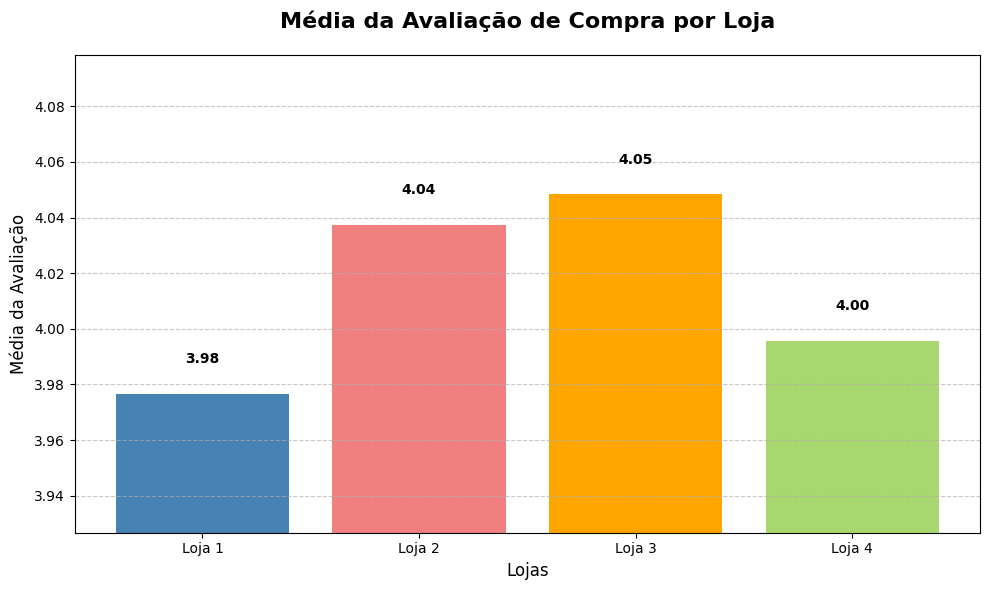

In [10]:
# --- Preparação para o Gráfico de Barras ---
nomes_lojas = df_medias['Loja'].tolist()
medias = df_medias['Média da Avaliação'].tolist()

# 3. Definição das cores solicitadas (Hexadecimais)
cores_finais = ['#4682B4', '#F08080', '#FFA500', '#A8D76F']

# 4. Criação do Gráfico de Barras
plt.figure(figsize=(10, 6))
barras = plt.bar(nomes_lojas, medias, color=cores_finais)

# Adicionando os valores da média acima de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 0.01,
             f'{yval:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Configurações do gráfico
plt.title('Média da Avaliação de Compra por Loja', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Média da Avaliação', fontsize=12)
plt.ylim(min(medias) - 0.05, max(medias) + 0.05) # Ajusta o limite Y para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [11]:
# Lista de DataFrames para cada loja
dataframes = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Lista para armazenar o produto mais vendido de cada loja
produtos_mais_vendidos = []

print("--- Produtos Mais Vendidos por Loja (Volume de Vendas) ---")

for nome_loja, df_loja in dataframes.items():

    # Agrupar por Produto e contar a qtde de venda por Produto
    vendas_por_produto = df_loja.groupby('Produto').size()

    # Converter a serie para DataFrame, renomear e ordenar
    df_ranking = vendas_por_produto.reset_index(name='Total de Vendas')
    df_ranking_ordenado = df_ranking.sort_values(
        by='Total de Vendas',
        ascending=False
    )

    # Obter o produto mais vendido
    produto_mais_vendido = df_ranking_ordenado.iloc[0]

    # Adicionar à lista de produtos mais vendidos
    produtos_mais_vendidos.append({
        'Loja': nome_loja,
        'Produto Mais Vendido': produto_mais_vendido['Produto'],
        'Total de Vendas': produto_mais_vendido['Total de Vendas']
    })

    # Exibir os produtos mais vendidos por loja
    print(f"\n| {nome_loja} |")
    print("-" * (len(nome_loja) + 5))
    print(df_ranking_ordenado.to_markdown(index=False))

# Exibir o resumo dos produtos mais vendidos por loja
df_mais_vendido = pd.DataFrame(produtos_mais_vendidos)

print("\n" + "="*50)
print(" Resumo: Produto de Maior Volume de Vendas por Loja")
print("="*50)
print(df_mais_vendido.to_markdown(index=False))

--- Produtos Mais Vendidos por Loja (Volume de Vendas) ---

| Loja 1 |
-----------
| Produto                     |   Total de Vendas |
|:----------------------------|------------------:|
| TV Led UHD 4K               |                60 |
| Micro-ondas                 |                60 |
| Guarda roupas               |                60 |
| Secadora de roupas          |                58 |
| Blocos de montar            |                56 |
| Cômoda                      |                56 |
| Bola de basquete            |                55 |
| Bicicleta                   |                54 |
| Copo térmico                |                54 |
| Geladeira                   |                54 |
| Impressora                  |                54 |
| Bateria                     |                53 |
| Faqueiro                    |                52 |
| Carrinho controle remoto    |                52 |
| Modelagem preditiva         |                51 |
| Fone de ouvido              |  

In [12]:
# Lista para armazenar o produto menos vendido de cada loja
produtos_menos_vendidos = []

print("--- Produtos Menos Vendidos por Loja (Volume de Vendas) ---")

for nome_loja, df_loja in dataframes.items():

    # Agrupar por Produto e contar a qtde de venda por Produto
    vendas_por_produto = df_loja.groupby('Produto').size()

    # Converter a serie para DataFrame, renomear e ordenar
    df_ranking = vendas_por_produto.reset_index(name='Total de Vendas')

    # Ordenar em ordem CRESCENTE
    df_ranking_ordenado = df_ranking.sort_values(
        by='Total de Vendas',
        ascending=True
    )

    # Obter o produto menos vendido
    produto_menos_vendido = df_ranking_ordenado.iloc[0]

    # Adicionar à lista de produtos menos vendidos
    produtos_menos_vendidos.append({
        'Loja': nome_loja,
        'Produto Menos Vendido': produto_menos_vendido['Produto'],
        'Total de Vendas': produto_menos_vendido['Total de Vendas']
    })

    # Exibir os produtos MENOS vendidos por loja
    print(f"\n| {nome_loja} |")
    print("-" * (len(nome_loja) + 5))
    print(df_ranking_ordenado.to_markdown(index=False))

# Exibir o resumo dos produtos menos vendidos por loja
df_menos_vendido = pd.DataFrame(produtos_menos_vendidos)

print("\n" + "="*50)
print(" Resumo: Produto de Menor Volume de Vendas por Loja")
print("="*50)
print(df_menos_vendido.to_markdown(index=False))

--- Produtos Menos Vendidos por Loja (Volume de Vendas) ---

| Loja 1 |
-----------
| Produto                     |   Total de Vendas |
|:----------------------------|------------------:|
| Celular ABXY                |                33 |
| Headset                     |                33 |
| Panela de pressão           |                35 |
| Pandeiro                    |                36 |
| Ciência de dados com python |                39 |
| Mochila                     |                39 |
| Corda de pular              |                40 |
| Assistente virtual          |                40 |
| Mesa de jantar              |                40 |
| Boneca bebê                 |                40 |
| Dinossauro Rex              |                40 |
| Poltrona                    |                41 |
| Jogo de copos               |                41 |
| Iniciando em programação    |                41 |
| Dashboards com Power BI     |                42 |
| Bola de vôlei               | 

# 5. Frete Médio por Loja

In [13]:
# Calcular a média da coluna 'Frete' para cada loja
media_frete_loja1 = loja['Frete'].mean()
media_frete_loja2 = loja2['Frete'].mean()
media_frete_loja3 = loja3['Frete'].mean()
media_frete_loja4 = loja4['Frete'].mean()

# Organizar os resultados em um DataFrame para comparação
dados_frete = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Custo Médio do Frete (R$)': [media_frete_loja1, media_frete_loja2, media_frete_loja3, media_frete_loja4]
}

df_fretes = pd.DataFrame(dados_frete)

# Ordenar para ver qual loja tem o frete mais caro/barato
df_fretes_ordenado = df_fretes.sort_values(
    by='Custo Médio do Frete (R$)',
    ascending=False
).reset_index(drop=True)

# Exibir os resultados formatados
print("--- Custo Médio do Frete por Loja ---")
print(df_fretes_ordenado.to_markdown(index=False, floatfmt=".2f"))

--- Custo Médio do Frete por Loja ---
| Loja   |   Custo Médio do Frete (R$) |
|:-------|----------------------------:|
| Loja 1 |                       34.69 |
| Loja 2 |                       33.62 |
| Loja 3 |                       33.07 |
| Loja 4 |                       31.28 |


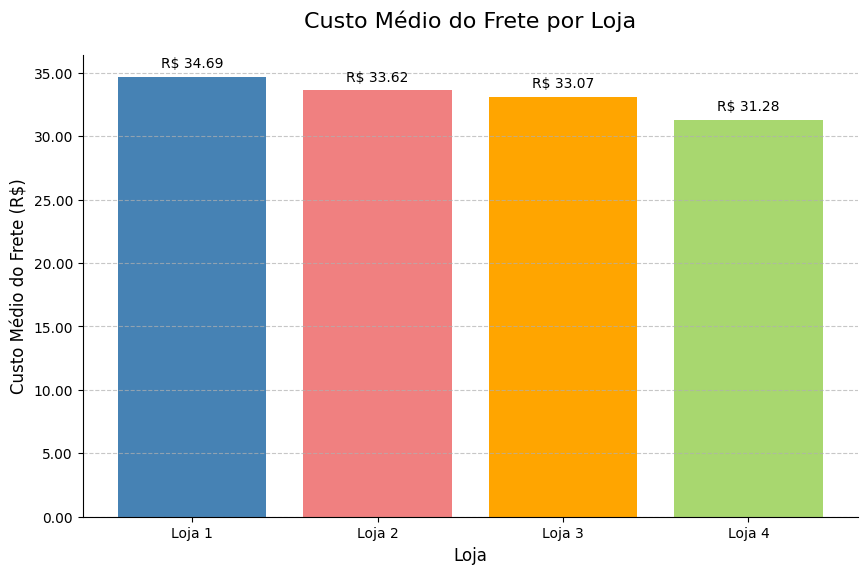

In [14]:
df_fretes = pd.DataFrame(dados_frete)

# 5. Ordenar para melhor visualização no gráfico
df_fretes_ordenado = df_fretes.sort_values(
    by='Custo Médio do Frete (R$)',
    ascending=False
).reset_index(drop=True)

# 6. Definir as cores e mapeá-las corretamente à loja, independente da ordem
cores_mapa = {
    'Loja 1': '#4682B4', # Steel Blue
    'Loja 2': '#F08080', # Light Coral
    'Loja 3': '#FFA500', # Orange
    'Loja 4': '#A8D76F'  # Light Green/Olive
}

# 7. Criar a lista de cores na ordem do DataFrame ordenado
cores_grafico = [cores_mapa[loja] for loja in df_fretes_ordenado['Loja']]

# 8. Geração do Gráfico de Barras Vertical
plt.figure(figsize=(10, 6)) # Define o tamanho da figura

# Cria o gráfico de barras
barras = plt.bar(
    df_fretes_ordenado['Loja'],
    df_fretes_ordenado['Custo Médio do Frete (R$)'],
    color=cores_grafico
)

# Adiciona título e rótulos
plt.title('Custo Médio do Frete por Loja', fontsize=16, pad=20)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Custo Médio do Frete (R$)', fontsize=12)

# Formata o eixo Y para exibir com duas casas decimais
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Adiciona os valores (média do frete) em cima de cada barra
for bar in barras:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.0,
        yval + 0.5, # Ajusta a posição vertical do texto
        f'R$ {yval:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Adiciona grade horizontal para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove as bordas desnecessárias do gráfico
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Exibe o gráfico
plt.show()

**Relatório Final — Recomendação de Venda de 1 das 4 Lojas**
1. Introdução
Objetivo: ajudar o Sr. João a decidir qual das quatro lojas vender para liberar capital para um novo investimento. A análise considera: faturamento total e percentual de participação de cada loja no faturamento geral, número de vendas e ticket médio de cada loja, vendas por categoria (por loja e agregadas), médias de avaliação por loja, produtos mais e menos vendidos por loja, e custo médio do frete por loja. Foram gerados gráficos para facilitar a visualização: faturamento por loja, participação relativa, ticket médio, avaliação média, custo de frete e comparação por categorias selecionadas.
________________________________________
2. Desenvolvimento — Apresentação dos dados e análise

2.1 Visão geral financeira e operacional

•	Faturamento total (R$)
o	Loja 1: R$ 1.534.509,12 (26,1%)
o	Loja 2: R$ 1.488.459,06 (25,4%)
o	Loja 3: R$ 1.464.025,03 (24,9%)
o	Loja 4: R$ 1.384.497,58 (23,6%)
o	Faturamento total geral: R$ 5.871.490,79

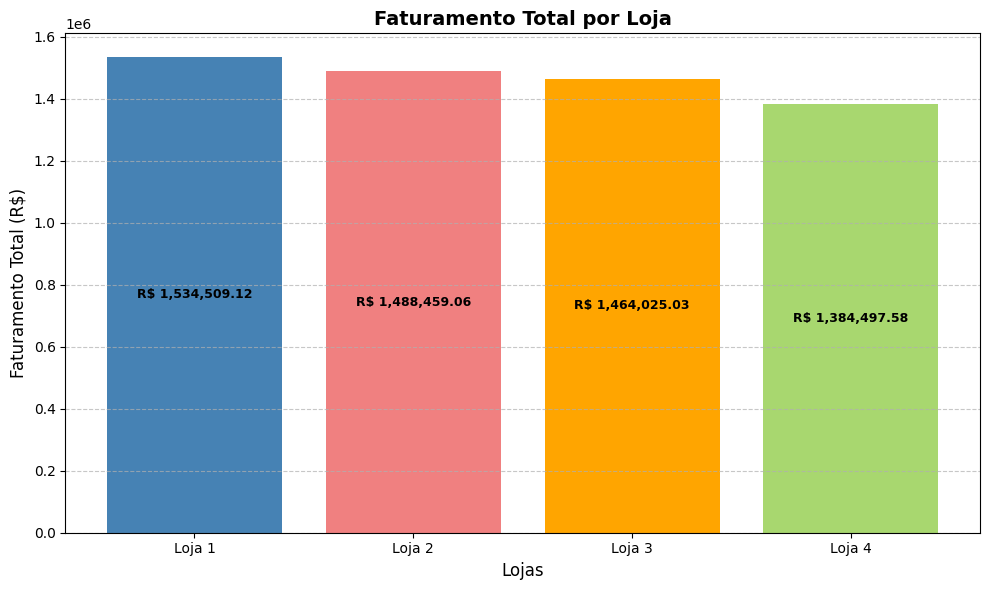

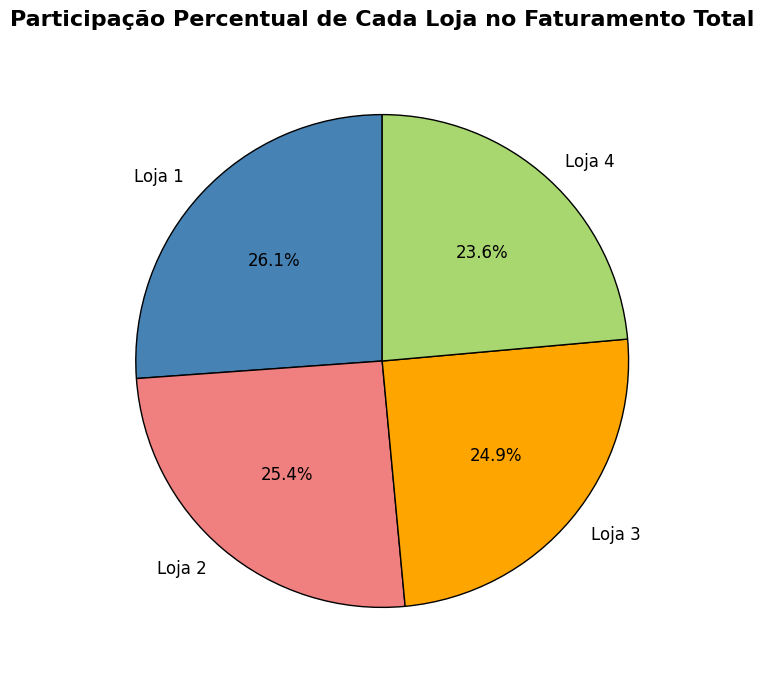

Interpretação: as quatro lojas têm faturamentos relativamente próximos (diferença entre a maior e a menor ~ R$150k), porém a Loja 4 é a que menos contribui para o faturamento total (23,6%).

•	Número de Vendas (volume)
Todas as lojas têm praticamente o mesmo volume de transações: 2.359 vendas (Loja 1, 2 e 3) e 2.358 (Loja 4). Ou seja, o número de vendas não explica a diferença de faturamento — o que importa é o ticket médio.

•	Ticket médio (R$)
o	Loja 1: R$ 650,49 (maior ticket)
o	Loja 2: R$ 630,97
o	Loja 3: R$ 620,61
o	Loja 4: R$ 587,15 (menor ticket)

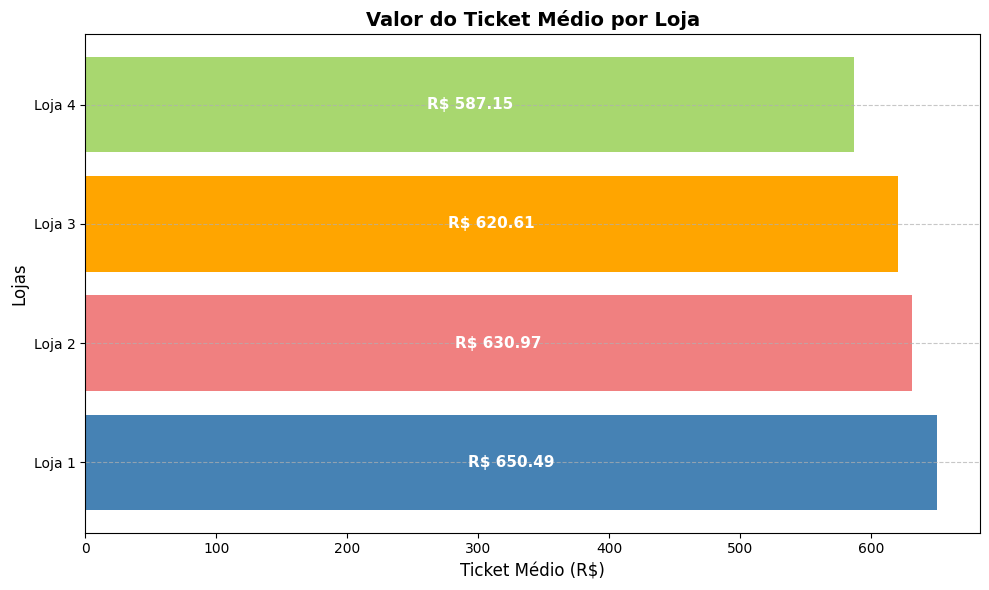

Interpretação: mesmo com volumes de vendas quase idênticos, a Loja 4 tem ticket médio ~9,7% menor que a Loja 1. Isso torna a Loja 4 menos eficiente em gerar receita por venda.

2.2 Vendas por categoria (resumo)

•	Ranking agregado por categoria (todas as lojas):
1.	moveis — 1.886 unidades
2.	eletronicos — 1.772
3.	brinquedos — 1.290
4.	eletrodomesticos — 1.149
5.	esporte e lazer — 1.113
6.	instrumentos musicais — 753
7.	livros — 742
8.	utilidades domesticas — 730

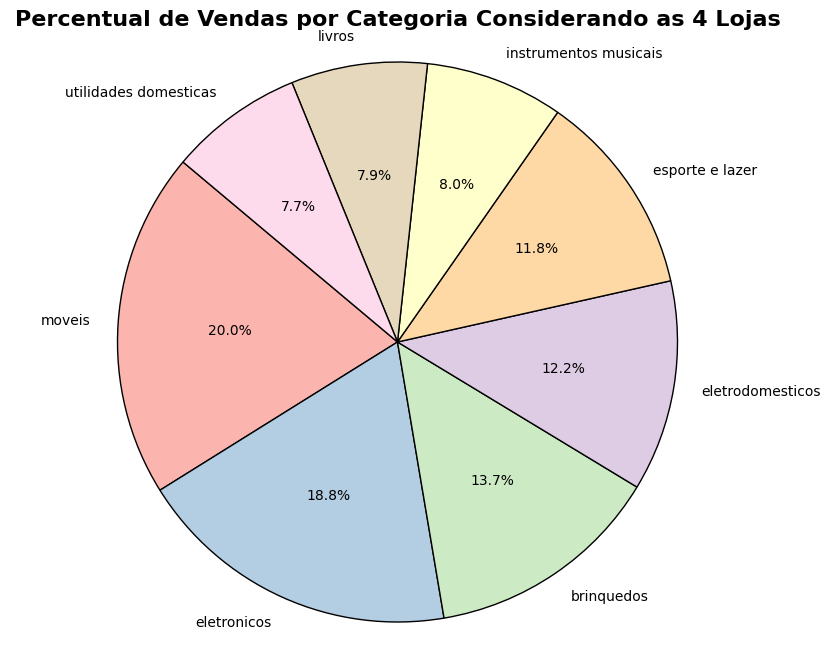

•	Observação por loja (categorias principais): todas as lojas têm forte desempenho em móveis e eletrônicos. A Loja 3 tem o maior volume em “moveis” (499) e em “eletrônicos” também é das maiores (451). A Loja 4, apesar de ter bom desempenho em móveis (480) e eletrônicos (451), apresenta menor contribuição nas categorias de maior ticket médio (comparativamente) e tem um número maior de vendas em categorias de menor valor médio (como brinquedos), o que ajuda a explicar seu ticket médio inferior.

2.3 Produtos mais/menos vendidos (resumo)

•	Produtos com maior volume por loja:

o	Loja 1: TV Led UHD 4K (60) — muitos itens de ticket alto no topo.

o	Loja 2: Iniciando em programação (65) — destaque em produto digital/educacional.

o	Loja 3: Kit banquetas (57) — forte em itens de mobiliário.

o	Loja 4: Cama box (62) — produto com volume elevado, porém segmento de móveis com forte competição de preço.

•	Produtos com menor volume: variações entre lojas, mas produtos como Celular ABXY, Guitarra e Jogo de tabuleiro aparecem entre os menos vendidos em diferentes lojas — sem sinal claro de que Loja 4 tenha produtos consistentemente de muito baixo desempenho comparado às demais (há itens fracos em todas).

Interpretação: Loja 4 tem um produto campeão (Cama box) com volume alto, mas o mix não consegue elevar o ticket médio tão bem quanto a Loja 1, que combina vendas de eletrônicos de maior valor (TV, geladeira, etc.).

2.4 Avaliação média de compra (satisfação)

•	Loja 3: 4,05 (melhor)
•	Loja 2: 4,04
•	Loja 4: 4,00
•	Loja 1: 3,98 (menor)

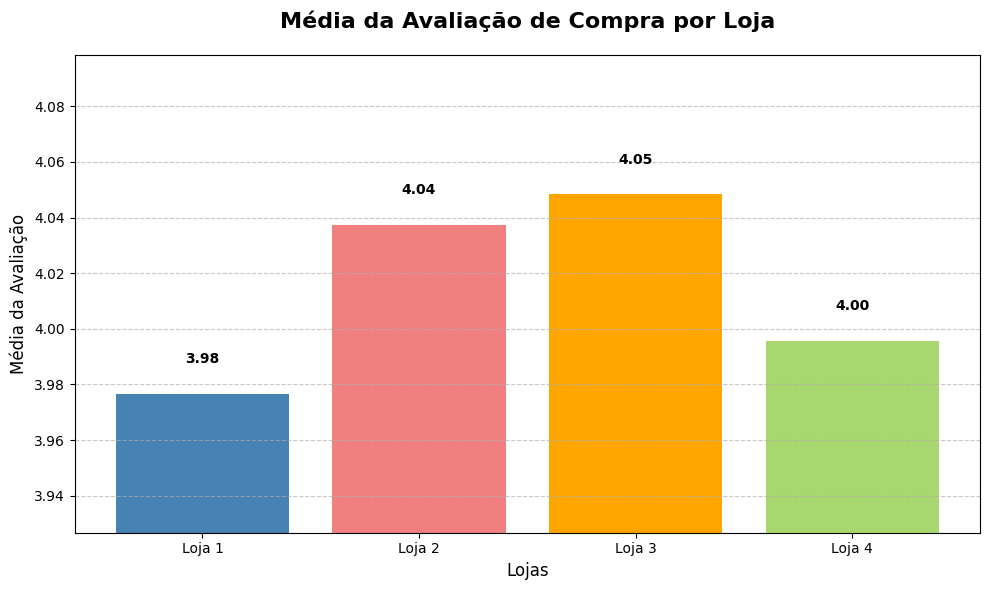

Interpretação: as avaliações estão muito próximas entre si — diferença máxima é pequena (4,05 vs 3,98). A Loja 4 tem avaliação aceitável (4,00), não sendo um ponto crítico negativo, mas também não é um diferencial positivo que compense as fraquezas financeiras.

2.5 Custo médio do frete

•	Loja 1: R$ 34,69
•	Loja 2: R$ 33,62
•	Loja 3: R$ 33,07
•	Loja 4: R$ 31,28 (menor custo de frete)

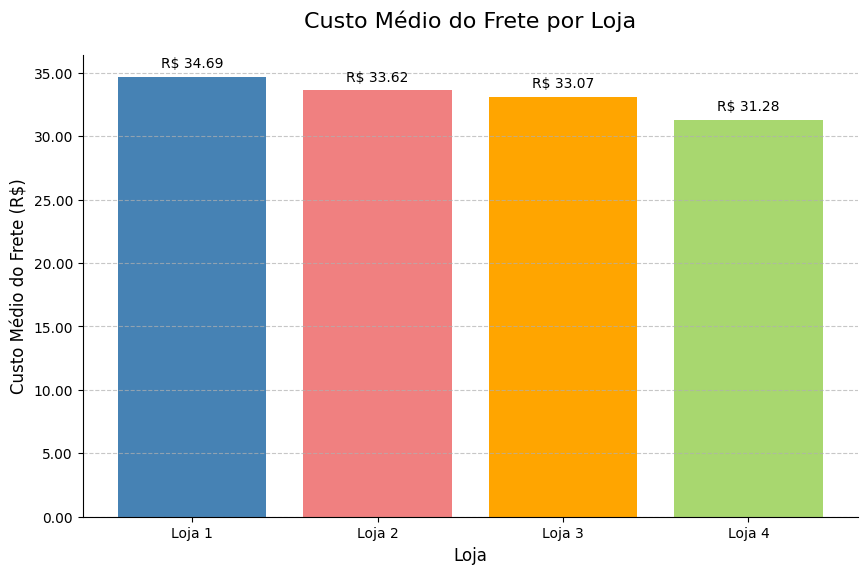

Interpretação: Loja 4 tem vantagem operacional no custo de frete (melhor eficiência logística/menor custo médio). Contudo, o ganho em frete (diferença de ~R$3-4) não compensa por si só a diferença no ticket médio e no faturamento total quando o objetivo é levantar capital via venda da loja.
________________________________________

3. Análise comparativa — pontos fortes e fracos (por loja)

Loja 1

•	Pontos fortes: maior faturamento absoluto; maior ticket médio (R$650,49); forte mix com eletrônicos de alto valor.

•	Pontos fracos: menor avaliação média (3,98) e custo de frete mais alto.

•	Consideração: estratégica conservar se quiser manter a maior fonte de ticket alto.

Loja 2

•	Pontos fortes: segundo maior faturamento; boa avaliação (4,04); produto mais vendido com volume alto (Iniciando em programação) — diversificação.

•	Pontos fracos: ticket médio menor que a Loja 1, mas ainda competitivo.

•	Consideração: equilibrada e com bom potencial.

Loja 3

•	Pontos fortes: avaliação média melhor (4,05); forte em móveis (maior volume em moveis) e bom faturamento.

•	Pontos fracos: ticket médio abaixo da Loja 1.

•	Consideração: boa reputação e consistente em vendas de itens de maior valor (móveis).

Loja 4

•	Pontos fortes: custo médio de frete mais baixo (R$31,28); produto com maior volume isolado (Cama box, 62 unidades); avaliação adequada (4,00).

•	Pontos fracos: menor faturamento total (R$1.384.498,58) e menor ticket médio (R$587,15) — apesar de volume de vendas praticamente igual às demais, converte menos receita por venda.

•	Consideração: custo logístico melhor, mas menos eficiente em valor por venda — isto reduz a sua atratividade quando o objetivo é maximizar o caixa obtido com a venda.
________________________________________
4. Conclusão e recomendação

Recomendação: Vender a Loja 4.

Justificativa (objetiva e apoiada nos dados):

1.	Menor contribuição ao faturamento total: Loja 4 responde por 23,6% do faturamento (a menor participação entre as quatro). Dado que todas as lojas têm número de vendas praticamente igual, essa participação menor indica menor eficiência de receita por transação.

2.	Menor ticket médio: com ticket médio de R$ 587,15, a Loja 4 tem o menor valor por venda — isto reduz o valor que a Loja 4 provavelmente geraria em uma venda do negócio e também limita o potencial de geração de caixa contínuo relativo às outras lojas.

3.	Sinergia limitada com portfólio: embora tenha vantagem de frete e um produto campeão (cama box), essas vantagens operacionais não compensam a distância em faturamento/ticket frente às outras lojas quando o objetivo é liberar capital para um novo investimento.

4.	Avaliação e posição competitiva neutras: a avaliação média (4,00) da Loja 4 é razoável, porém não é um diferencial forte que torne a loja imprescindível. Ao vender a Loja 4, o Sr. João preserva lojas com tickets maiores (1, 2 e 3) e a melhor avaliação média (Loja 3 e Loja 2), mantendo o core de receita e reputação.

Regra prática financeira: ao vender, o objetivo é maximizar o montante líquido obtido e, simultaneamente, preservar a operação mais lucrativa e com maior potencial. A Loja 4 é a que menos contribui à geração de receita por venda; vendê-la libera capital com menor impacto no faturamento consolidado e preserva as lojas mais rentáveis por venda (principalmente Loja 1, e também 2 e 3).

